### Modeling Distributions
#### Empirical vs Analytic Distributions
Empirical distributions are based on observed data, while analytical distributions are based on mathematical functions. Analytic distributions can be used to model empirical distributions.


#### Exponential Distribution
The CDF of the exponential distribution is of the form `1 - e^-kx`, where k will determine the shape of the distribution. Here are some visuals of the exponential distribution:

In [35]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (12, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78", "#ED8936", "#9F7AEA", "#ECC94B"])
rcParams["axes.facecolor"] = "#1A202C"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

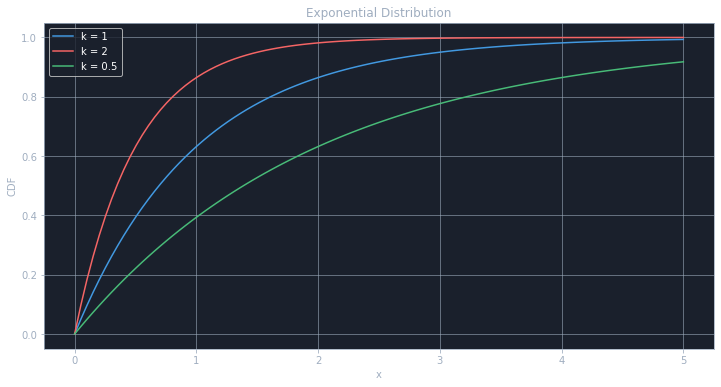

In [11]:
import pandas as pd
import numpy as np

def CDFFunc(k, x):
    return 1 - np.exp(x * -k)

xValues = np.linspace(0, 5, 100)

plt.plot(xValues, CDFFunc(1, xValues), label="k = 1")
plt.plot(xValues, CDFFunc(2, xValues), label="k = 2")
plt.plot(xValues, CDFFunc(0.5, xValues), label="k = 0.5")
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend(loc=2)

Exponential distributions show up when we measure the times between each event in a series of events, called **interarrival times**. If the events are equally likely to occur at any time, the distribution of interarrival times tend to look like exponential distributions.

To be able to tell if a CDF graphed from empirical distribution have the general shape of an exponential distribution, plot the complementary CDF, `1 - CDF(x)`, on a log-y scale. The result should be a straight line.

Text(0, 0.5, 'log CDF')

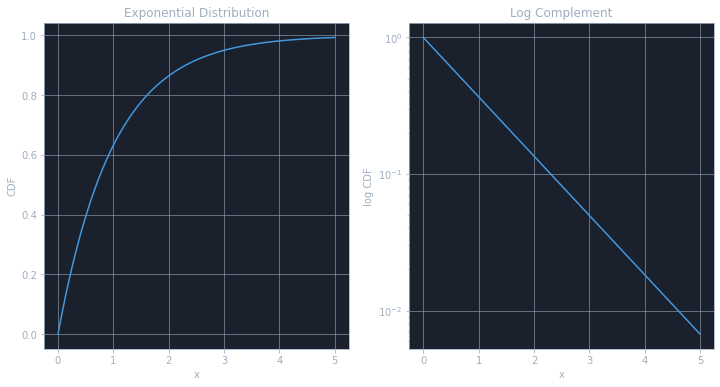

In [28]:
plt.subplot(1, 2, 1)
plt.plot(xValues, CDFFunc(1, xValues))
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("CDF")

plt.subplot(1, 2, 2)
plt.plot(xValues, 1 - CDFFunc(1, xValues))
plt.yscale("log")
plt.title("Log Complement")
plt.xlabel("x")
plt.ylabel("log CDF")

In [18]:
df = pd.read_pickle("nsfg_data.pkl")

def ReverseCMC(cmc):
    year = 1900 + ((cmc - 1) // 12)
    month = cmc - (12 * (year - 1900))
    
    return (year, month)

year, month = ReverseCMC(1197)
print(year, month)

2002 1


#### Normal/Gaussian Distribution
A distribution characterized by two parameters, mean (mu) and standard deviation (sigma). When the mean is 0 and the standard deviation is 1, the distribution is called the **standard normal distribution**. This is how changing the mean changes the graph:

Text(0.5, 1.0, 'Changes To Mean')

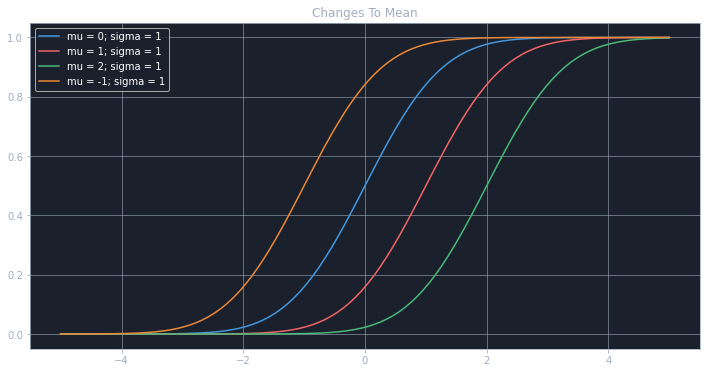

In [37]:
import scipy.stats

def NormCDF(x, mu, sigma):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

xValues = np.linspace(-5, 5, 100)

plt.plot(xValues, [NormCDF(x, 0, 1) for x in xValues], label="mu = 0; sigma = 1")
plt.plot(xValues, [NormCDF(x, 1, 1) for x in xValues], label="mu = 1; sigma = 1")
plt.plot(xValues, [NormCDF(x, 2, 1) for x in xValues], label="mu = 2; sigma = 1")
plt.plot(xValues, [NormCDF(x, -1, 1) for x in xValues], label="mu = -1; sigma = 1")
plt.legend(loc=2)
plt.title("Changes To Mean")

And this is how the standard deviation changes the graph:

Text(0.5, 1.0, 'Changes To Standard Deviation')

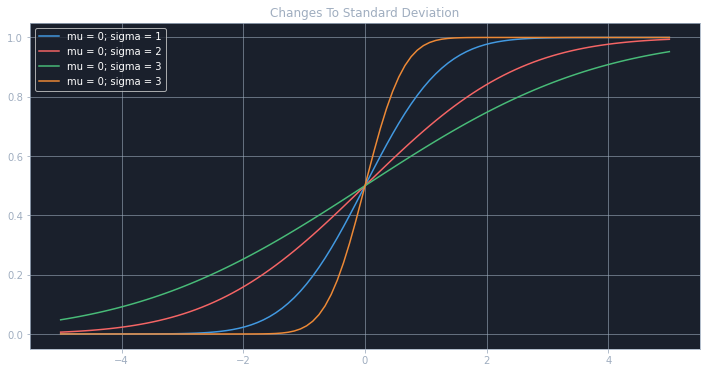

In [42]:
plt.plot(xValues, [NormCDF(x, 0, 1) for x in xValues], label="mu = 0; sigma = 1")
plt.plot(xValues, [NormCDF(x, 0, 2) for x in xValues], label="mu = 0; sigma = 2")
plt.plot(xValues, [NormCDF(x, 0, 3) for x in xValues], label="mu = 0; sigma = 3")
plt.plot(xValues, [NormCDF(x, 0, 0.5) for x in xValues], label="mu = 0; sigma = 3")
plt.legend(loc=2)
plt.title("Changes To Standard Deviation")

The CDF of weights of all live births can be modeled with the CDF of a normal distribution with `mu = 7.28` and `sigma = 1.24`:

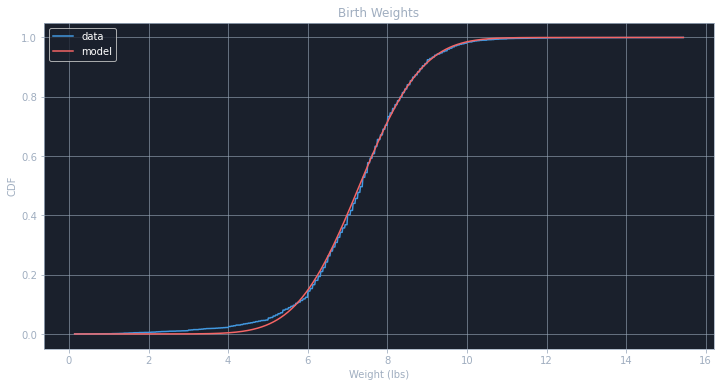

In [56]:
live = df[df["outcome"] == 1]
weights = live["totalwgt_lb"].dropna()

mean = 7.28
std = 1.24

hist, bins = np.histogram(weights, bins=1000, density=True)
offset = bins[1:] - bins[:-1]

plt.plot(bins[:-1] + offset, np.cumsum(hist) / np.cumsum(hist)[-1], label="data")
plt.plot(bins[:-1] + offset, [NormCDF(x, mean, std) for x in bins[:-1]], label="model")
plt.title("Birth Weights")
plt.xlabel("Weight (lbs)")
plt.ylabel("CDF")
plt.legend(loc=2)

Below the 10th percentile (CDF <= 0.1), there seems to be more light babies than expected in a normal distribution.